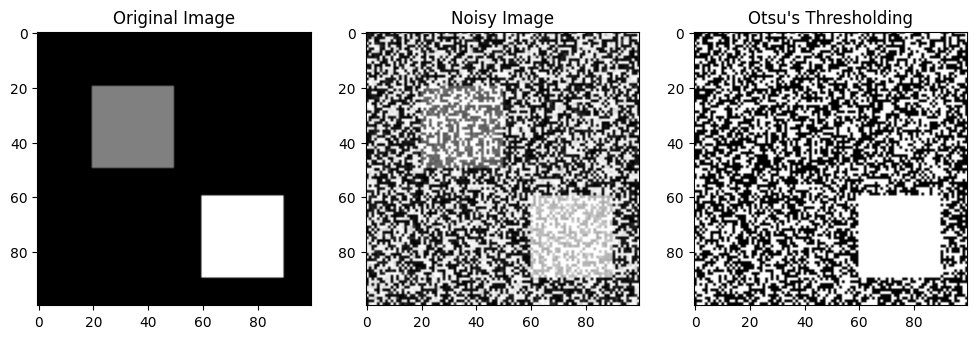

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a synthetic image
image = np.zeros((100, 100), dtype=np.uint8)
image[20:50, 20:50] = 85    # Object 1
image[60:90, 60:90] = 170   # Object 2

# Step 2: Add Gaussian noise
mean = 0
std = 20
gaussian_noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, gaussian_noise)

# Step 3: Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.show()


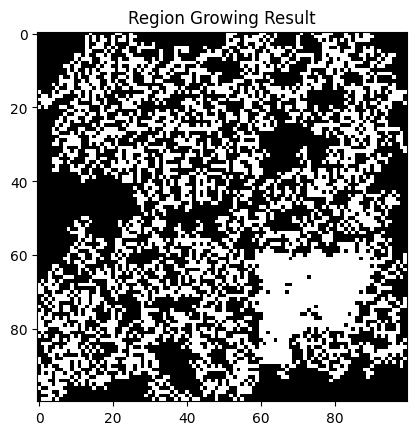

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def region_growing(image, seeds, threshold=5):
    height, width = image.shape
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image, dtype=bool)
    stack = seeds.copy()

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        segmented[x, y] = 255

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                    if abs(int(image[nx, ny]) - int(image[x, y])) <= threshold:
                        stack.append((nx, ny))
    return segmented

# Use the noisy image from Task 1
seed_points = [(25, 25), (75, 75)]
result = region_growing(noisy_image, seed_points, threshold=20)

# Visualization
plt.figure()
plt.title('Region Growing Result')
plt.imshow(result, cmap='gray')
plt.show()
